<a href="https://colab.research.google.com/github/deClot/Raw_materials_Sibur2020/blob/master/Raw_material.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import IPython
def display(*dfs):
  for df in dfs:
    IPython.display.display(df)

In [ ]:
train = pd.read_csv('train_features.csv')
targets = pd.read_csv('train_targets.csv')
test = pd.read_csv('test_features.csv')
display(train, targets, test)

,timestamp,A_rate,A_CH4,A_C2H6,A_C3H8,A_iC4H10,A_nC4H10,A_iC5H12,A_nC5H12,A_C6H14,B_rate
0,2020-01-01 00:00:00,70.855017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.982789
1,2020-01-01 00:30:00,70.826582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.965098
2,2020-01-01 01:00:00,70.809637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.867409
3,2020-01-01 01:30:00,69.994748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.839126
4,2020-01-01 02:00:00,70.072762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.336921
...,...,...,...,...,...,...,...,...,...,...,...
5803,2020-04-30 21:30:00,72.009730,0.284151,4.936343,35.758852,16.473834,24.318968,6.069360,5.527463,6.577563,74.183355
5804,2020-04-30 22:00:00,71.854180,0.282501,4.960453,35.877193,16.448487,24.074193,5.981357,5.407256,6.915378,74.213066
5805,2020-04-30 22:30:00,71.783273,0.277686,5.013878,36.271557,16.500147,24.010123,5.829363,5.160329,6.884173,74.144367
5806,2020-04-30 23:00:00,71.717743,0.271106,5.080144,36.616673,16.559533,24.008848,5.750492,5.017941,6.642076,74.320575


,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-01-01 00:00:00,4.561979,39.015486,17.250740,24.301793
1,2020-01-01 00:30:00,4.550741,39.048915,17.229506,24.257461
2,2020-01-01 01:00:00,4.506793,38.766378,17.171621,24.236298
3,2020-01-01 01:30:00,4.584963,39.069360,17.218521,24.149843
4,2020-01-01 02:00:00,4.607483,38.817579,17.108668,24.049510
...,...,...,...,...,...
5803,2020-04-30 21:30:00,4.816865,35.539156,16.269938,24.770377
5804,2020-04-30 22:00:00,4.993286,36.067750,16.317757,24.729847
5805,2020-04-30 22:30:00,5.101574,36.275040,16.295460,24.629889
5806,2020-04-30 23:00:00,5.210675,36.872917,16.336359,24.438236


,timestamp,A_rate,A_CH4,A_C2H6,A_C3H8,A_iC4H10,A_nC4H10,A_iC5H12,A_nC5H12,A_C6H14,B_rate
0,2020-05-01 00:00:00,71.428342,0.267832,5.135159,36.816480,16.632260,24.062587,5.696004,4.939430,6.395286,74.273009
1,2020-05-01 00:30:00,70.925118,0.268464,5.149646,36.869023,16.651870,24.069800,5.676384,4.911872,6.346957,74.061833
2,2020-05-01 01:00:00,70.991719,0.270641,5.154615,37.074965,16.710967,24.106152,5.574873,4.808516,6.242636,73.856268
3,2020-05-01 01:30:00,70.972406,0.275241,5.230661,37.384180,16.683337,24.021993,5.514843,4.730887,6.101647,73.750744
4,2020-05-01 02:00:00,70.980078,0.275062,5.241437,37.448587,16.663863,24.003237,5.524898,4.728882,6.057119,73.698447
...,...,...,...,...,...,...,...,...,...,...,...
3979,2020-07-22 21:30:00,72.600912,0.120985,4.328092,40.875930,17.741460,24.098520,4.469224,3.619095,4.686205,75.486026
3980,2020-07-22 22:00:00,72.107049,0.110734,4.013567,38.871418,17.449352,24.049532,4.770699,3.988215,6.689777,75.370451
3981,2020-07-22 22:30:00,71.805799,0.111535,4.041506,39.794323,17.635380,24.169473,4.613603,3.790651,5.785216,74.985878
3982,2020-07-22 23:00:00,72.112046,0.119362,4.131432,40.461503,17.758833,24.211013,4.504242,3.657459,5.094626,74.766867


In [ ]:
train['is_test'] = 0
test['is_test'] = 1
df = pd.concat((train, test), axis=0, ignore_index=True)
df = df.merge(targets, on='timestamp', how='left')
df.timestamp = pd.to_datetime(df.timestamp)
# df.set_index('timestamp', inplace=True)
df

,timestamp,A_rate,A_CH4,A_C2H6,A_C3H8,A_iC4H10,A_nC4H10,A_iC5H12,A_nC5H12,A_C6H14,B_rate,is_test,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-01-01 00:00:00,70.855017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.982789,0,4.561979,39.015486,17.250740,24.301793
1,2020-01-01 00:30:00,70.826582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.965098,0,4.550741,39.048915,17.229506,24.257461
2,2020-01-01 01:00:00,70.809637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.867409,0,4.506793,38.766378,17.171621,24.236298
3,2020-01-01 01:30:00,69.994748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.839126,0,4.584963,39.069360,17.218521,24.149843
4,2020-01-01 02:00:00,70.072762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.336921,0,4.607483,38.817579,17.108668,24.049510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9787,2020-07-22 21:30:00,72.600912,0.120985,4.328092,40.875930,17.741460,24.098520,4.469224,3.619095,4.686205,75.486026,1,NaN,NaN,NaN,NaN
9788,2020-07-22 22:00:00,72.107049,0.110734,4.013567,38.871418,17.449352,24.049532,4.770699,3.988215,6.689777,75.370451,1,NaN,NaN,NaN,NaN
9789,2020-07-22 22:30:00,71.805799,0.111535,4.041506,39.794323,17.635380,24.169473,4.613603,3.790651,5.785216,74.985878,1,NaN,NaN,NaN,NaN
9790,2020-07-22 23:00:00,72.112046,0.119362,4.131432,40.461503,17.758833,24.211013,4.504242,3.657459,5.094626,74.766867,1,NaN,NaN,NaN,NaN


In [ ]:
names = ['timestamp','is_test'] + ['A_rate', 'B_rate',
                                   'A_C2H6', 'B_C2H6',
                                   'A_C3H8', 'B_C3H8',
                                   'A_iC4H10', 'B_iC4H10',
                                   'A_nC4H10', 'B_nC4H10',
                                   'A_CH4', 'A_iC5H12', 
                                   'A_nC5H12', 'A_C6H14']
names_A = [name for name in names if 'A_' in name][1:]

df = df[names]

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%matplotlib inline

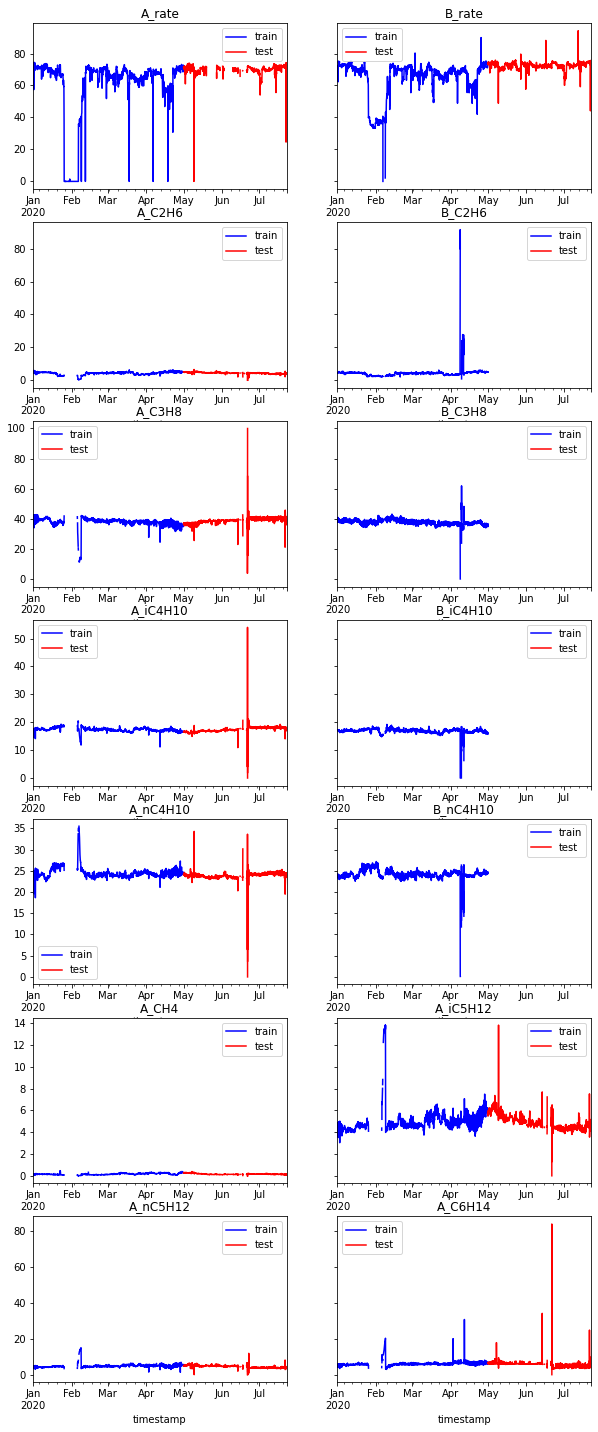

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,25),sharey='row')

for ax, feature in zip(axes.ravel(), df.columns[2:]):
  ax.set_title(feature)
  df[df.is_test==0].plot(x='timestamp', y=feature, ax=ax, label='train', color='blue')
  df[df.is_test==1].plot(x='timestamp', y=feature, ax=ax, label='test', color='red')

In [ ]:
df.set_index('timestamp', inplace=True)

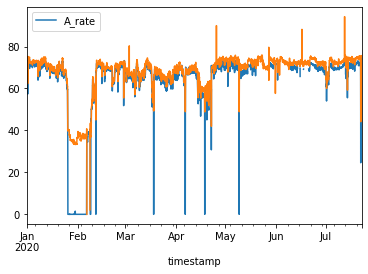

In [ ]:
B = df[ 'B_rate']
# B.B_rate -= 20
ax = plt.subplot()
df.plot(y='A_rate', ax=ax)
B.plot(y='B_rate', ax=ax)

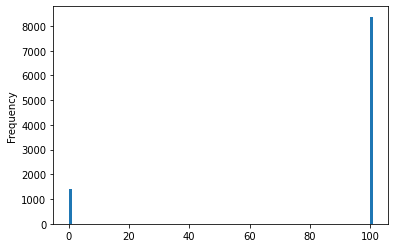

In [ ]:
df['all_a_components'] = df[names_A].sum(axis=1)
df.all_a_components.plot(kind='hist', bins=100)

In [ ]:
df[df.all_a_components < 10].all_a_components.sort_values()

timestamp
2020-01-01 00:00:00    0.000000
2020-04-30 02:00:00    0.000000
2020-04-30 01:30:00    0.000000
2020-04-30 01:00:00    0.000000
2020-04-30 00:30:00    0.000000
                         ...   
2020-02-03 01:00:00    0.000000
2020-02-03 00:00:00    0.000000
2020-07-15 08:00:00    0.000000
2020-06-18 23:00:00    4.148695
2020-06-18 23:30:00    4.167530
Name: all_a_components, Length: 1411, dtype: float64

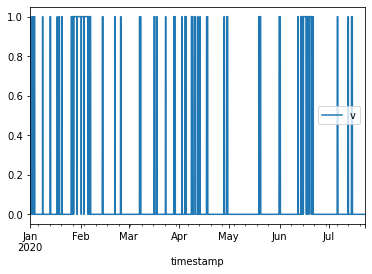

In [ ]:
t = df[df.all_a_components < 5].reset_index()
# tt = (t.timestamp - t.shift(1, fill_value=0).timestamp)
# tt[tt > pd.Timedelta('0 days 00:30:00')].iloc[1:].sort_values().tail(50)
t = t['timestamp']
tt = df.index.to_frame()
tt['v'] = np.where(tt['timestamp'].isin(t), 1, 0)
tt.plot(y='v')

In [ ]:
df.loc[['2020-06-18 23:00:00', '2020-06-18 23:30:00']]

,is_test,A_rate,B_rate,A_C2H6,B_C2H6,A_C3H8,B_C3H8,A_iC4H10,B_iC4H10,A_nC4H10,B_nC4H10,A_CH4,A_iC5H12,A_nC5H12,A_C6H14,all_a_components
timestamp,,,,,,,,,,,,,,,,
2020-06-18 23:00:00,1,NaN,71.394341,4.148695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.148695
2020-06-18 23:30:00,1,NaN,71.518385,4.167530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.167530


In [ ]:
df[df.all_a_components > 90].all_a_components.sort_values()

timestamp
2020-06-21 13:30:00     93.473273
2020-05-09 10:30:00     99.918203
2020-03-18 09:00:00     99.918767
2020-05-09 10:00:00     99.920746
2020-07-21 17:00:00     99.921428
                          ...    
2020-06-21 10:30:00    100.000003
2020-06-21 11:30:00    100.000005
2020-06-21 11:00:00    100.000007
2020-06-21 15:30:00    100.287338
2020-05-09 14:00:00    100.818755
Name: all_a_components, Length: 8379, dtype: float64

In [ ]:
df.loc[['2020-06-21 13:30:00']]

,is_test,A_rate,B_rate,A_C2H6,B_C2H6,A_C3H8,B_C3H8,A_iC4H10,B_iC4H10,A_nC4H10,B_nC4H10,A_CH4,A_iC5H12,A_nC5H12,A_C6H14,all_a_components
timestamp,,,,,,,,,,,,,,,,
2020-06-21 13:30:00,1,71.936886,74.206501,0.078523,NaN,68.149836,NaN,2.007036,NaN,3.73648,NaN,0.005033,1.316491,1.72344,16.456435,93.473273
